<a href="https://colab.research.google.com/github/bhargav23/CNN-Projects/blob/master/VGG/Fashion_Mnist_VGG11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
!git clone https://github.com/bhargav23/CNN-Projects

Cloning into 'CNN-Projects'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 113 (delta 59), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (113/113), 316.03 KiB | 1.22 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import sys
sys.path.append('/content/CNN-Projects/Libraries')

In [ ]:
import evadataloader
dataloader = evadataloader.DataLoader()


# Train Phase transformations
train_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])



trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=train_transforms)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=test_transforms)
testloader = dataloader.load(testset)

classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...



Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


torch.Size([512, 1, 28, 28])
torch.Size([512])


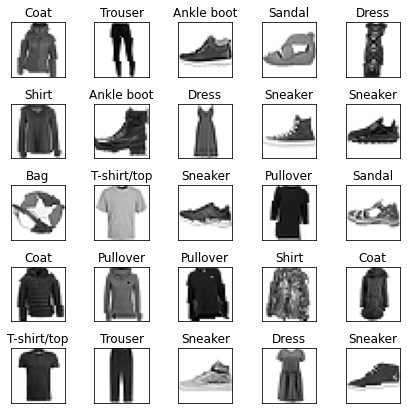

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
def show25(images, labels):
  r, c = 5, 5
  figmatrix = plt.figure(figsize=(7, 7))
  gs1 = gridspec.GridSpec(r, c)
  gs1.update(wspace=0.5, hspace=0.5) # set the 
  for i in range(1, r*c+1):
    plt.subplot(gs1[i-1])
    plt.tick_params( axis='both', which='both', labelbottom=False, labelleft=False, left=False, bottom=False)
    plt.imshow(images[i-1].numpy().squeeze(), cmap='gray_r')
    plt.title(classes[labels[i-1]])
  plt.show()

show25(images[:25], labels[:25])

In [ ]:
import vggnet
net = vggnet.VGG('VGG11')

In [ ]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
       BatchNorm2d-2           [-1, 64, 28, 28]             128
              ReLU-3           [-1, 64, 28, 28]               0
         MaxPool2d-4           [-1, 64, 14, 14]               0
            Conv2d-5          [-1, 128, 14, 14]          73,856
       BatchNorm2d-6          [-1, 128, 14, 14]             256
              ReLU-7          [-1, 128, 14, 14]               0
         MaxPool2d-8            [-1, 128, 7, 7]               0
            Conv2d-9            [-1, 256, 7, 7]         295,168
      BatchNorm2d-10            [-1, 256, 7, 7]             512
             ReLU-11            [-1, 256, 7, 7]               0
           Conv2d-12            [-1, 256, 7, 7]         590,080
      BatchNorm2d-13            [-1, 256, 7, 7]             512
             ReLU-14            [-

In [ ]:
import evascheduler

In [ ]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)

  0%|          | 0/118 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.20003360509872437 Batch_id=117 Accuracy=83.97: 100%|██████████| 118/118 [00:11<00:00, 10.21it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1230, Accuracy: 8770/10000 (87.70%)

EPOCH: 1


Loss=0.28278836607933044 Batch_id=117 Accuracy=90.05: 100%|██████████| 118/118 [00:11<00:00,  9.89it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1183, Accuracy: 8817/10000 (88.17%)

EPOCH: 2


Loss=0.234380841255188 Batch_id=117 Accuracy=91.43: 100%|██████████| 118/118 [00:11<00:00,  9.88it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1010, Accuracy: 8990/10000 (89.90%)

EPOCH: 3


Loss=0.12791939079761505 Batch_id=117 Accuracy=92.48: 100%|██████████| 118/118 [00:12<00:00,  9.69it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0944, Accuracy: 9056/10000 (90.56%)

EPOCH: 4


Loss=0.22712697088718414 Batch_id=117 Accuracy=93.21: 100%|██████████| 118/118 [00:12<00:00,  9.68it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0851, Accuracy: 9149/10000 (91.49%)

EPOCH: 5


Loss=0.18695060908794403 Batch_id=117 Accuracy=93.79: 100%|██████████| 118/118 [00:12<00:00,  9.75it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0799, Accuracy: 9201/10000 (92.01%)

EPOCH: 6


Loss=0.12576106190681458 Batch_id=117 Accuracy=95.73: 100%|██████████| 118/118 [00:12<00:00,  9.51it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0725, Accuracy: 9275/10000 (92.75%)

EPOCH: 7


Loss=0.1408875435590744 Batch_id=117 Accuracy=96.35: 100%|██████████| 118/118 [00:12<00:00,  9.78it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0711, Accuracy: 9289/10000 (92.89%)

EPOCH: 8


Loss=0.058035507798194885 Batch_id=117 Accuracy=96.68: 100%|██████████| 118/118 [00:12<00:00,  9.81it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0709, Accuracy: 9291/10000 (92.91%)

EPOCH: 9


Loss=0.11573094874620438 Batch_id=117 Accuracy=96.84: 100%|██████████| 118/118 [00:12<00:00,  9.46it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0694, Accuracy: 9306/10000 (93.06%)

EPOCH: 10


Loss=0.07098111510276794 Batch_id=117 Accuracy=96.97: 100%|██████████| 118/118 [00:12<00:00,  9.19it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0707, Accuracy: 9293/10000 (92.93%)

EPOCH: 11


Loss=0.06813052296638489 Batch_id=117 Accuracy=97.19: 100%|██████████| 118/118 [00:12<00:00,  9.58it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0690, Accuracy: 9310/10000 (93.10%)

EPOCH: 12


Loss=0.102629654109478 Batch_id=117 Accuracy=97.41: 100%|██████████| 118/118 [00:12<00:00,  9.33it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0687, Accuracy: 9313/10000 (93.13%)

EPOCH: 13


Loss=0.13455235958099365 Batch_id=117 Accuracy=97.47: 100%|██████████| 118/118 [00:12<00:00,  9.34it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0678, Accuracy: 9322/10000 (93.22%)

EPOCH: 14


Loss=0.10779974609613419 Batch_id=117 Accuracy=97.49: 100%|██████████| 118/118 [00:12<00:00,  9.44it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0686, Accuracy: 9314/10000 (93.14%)

EPOCH: 15


Loss=0.11896156519651413 Batch_id=117 Accuracy=97.51: 100%|██████████| 118/118 [00:12<00:00,  9.12it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0680, Accuracy: 9320/10000 (93.20%)

EPOCH: 16


Loss=0.07720101624727249 Batch_id=117 Accuracy=97.52: 100%|██████████| 118/118 [00:12<00:00,  9.26it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0688, Accuracy: 9312/10000 (93.12%)

EPOCH: 17


Loss=0.05039678141474724 Batch_id=117 Accuracy=97.56: 100%|██████████| 118/118 [00:12<00:00,  9.24it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0686, Accuracy: 9314/10000 (93.14%)

EPOCH: 18


Loss=0.06595537811517715 Batch_id=117 Accuracy=97.63: 100%|██████████| 118/118 [00:12<00:00,  9.40it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0684, Accuracy: 9316/10000 (93.16%)

EPOCH: 19


Loss=0.10788478702306747 Batch_id=117 Accuracy=97.55: 100%|██████████| 118/118 [00:12<00:00,  9.16it/s]



Test set: Average loss: 0.0689, Accuracy: 9311/10000 (93.11%)



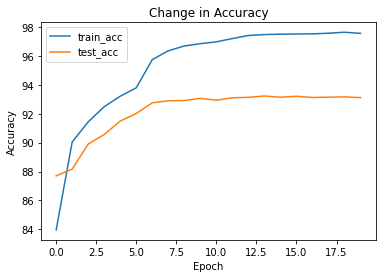

In [ ]:
from evascheduler import draw_graph
draw_graph()

In [ ]:
from evascheduler import get_misclassified
misclassified = get_misclassified()

In [ ]:
def plot_images(img_data,classes,img_name):
  figure = plt.figure(figsize=(10, 10))
  
  num_of_images = len(img_data)
  for index in range(1, num_of_images + 1):
      img = img_data[index-1][0][0]
      plt.subplot(5, 5, index)
      plt.axis('off')
      plt.imshow(img.cpu().numpy(),cmap='gray_r')
      plt.title("Actual: %s\nPredicted: %s" % (classes[img_data[index-1][1]], classes[img_data[index-1][2]]))
  
  plt.tight_layout()
  plt.savefig(img_name)


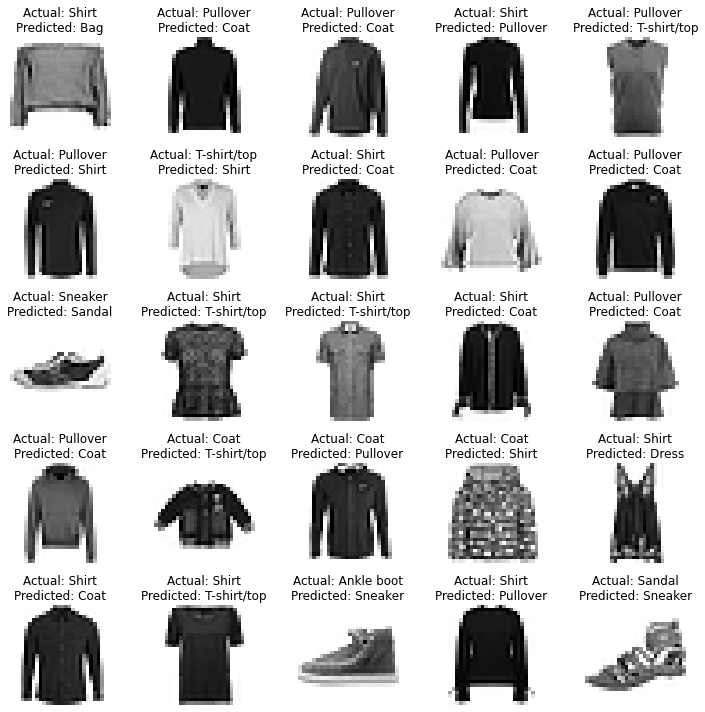

In [ ]:
#import utils
#from utils import plot_images
plot_images(misclassified,classes,"misclassified.png")